✅ SVGファイル 'reward_structure_graph.svg' を出力しました。


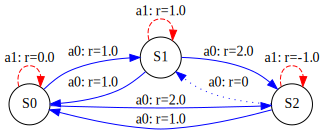

In [3]:
# 必要なモジュールのインポート
import numpy as np
from graphviz import Digraph

# 報酬構造（r[i, j, a]）の定義
r = np.zeros((3, 3, 2))
r[0, 1, 0] = 1.0
r[0, 2, 0] = 2.0
r[0, 0, 1] = 0.0
r[1, 0, 0] = 1.0
r[1, 2, 0] = 2.0
r[1, 1, 1] = 1.0
r[2, 0, 0] = 1.0
r[2, 1, 0] = 0.0
r[2, 2, 1] = -1.0

# Graphviz オブジェクトの作成
dot = Digraph(comment="MDP Reward Structure")
dot.attr(rankdir='LR', size='8,5')

# 状態ノードの追加
for i in range(3):
    dot.node(f"S{i}", f"S{i}", shape="circle")

# 行動0（move）による遷移と報酬の追加（青色矢印）
for i in range(3):
    to1 = (i + 1) % 3
    to2 = (i + 2) % 3
    r1 = r[i, to1, 0]
    r2 = r[i, to2, 0]

    if r1 != 0:
        dot.edge(f"S{i}", f"S{to1}", label=f"a0: r={r1}", color="blue")
    else:
        dot.edge(f"S{i}", f"S{to1}", label="a0: r=0", style="dotted", color="blue")

    if r2 != 0:
        dot.edge(f"S{i}", f"S{to2}", label=f"a0: r={r2}", color="blue")
    else:
        dot.edge(f"S{i}", f"S{to2}", label="a0: r=0", style="dotted", color="blue")

# 行動1（stay）による自己ループと報酬の追加（赤色破線矢印）
for i in range(3):
    r_self = r[i, i, 1]
    label = f"a1: r={r_self}"
    style = "dashed"
    color = "red"
    dot.edge(f"S{i}", f"S{i}", label=label, style=style, color=color)

# ファイルに保存（SVG形式）
dot.render("reward_structure_graph", format="svg", cleanup=True)

print("✅ SVGファイル 'reward_structure_graph.svg' を出力しました。")

from IPython.display import SVG, display

# 保存済みSVGファイルのパスを指定して表示
display(SVG(filename="reward_structure_graph.svg"))